In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Задача 1.

In [2]:
df = pd.read_csv('kc-house-data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# l_data = pd.read_csv('laptops_10.csv', sep=',')
# l_data.head()

    1.2. Изучите стоимости недвижимости

Text(0, 0.5, 'Количество')

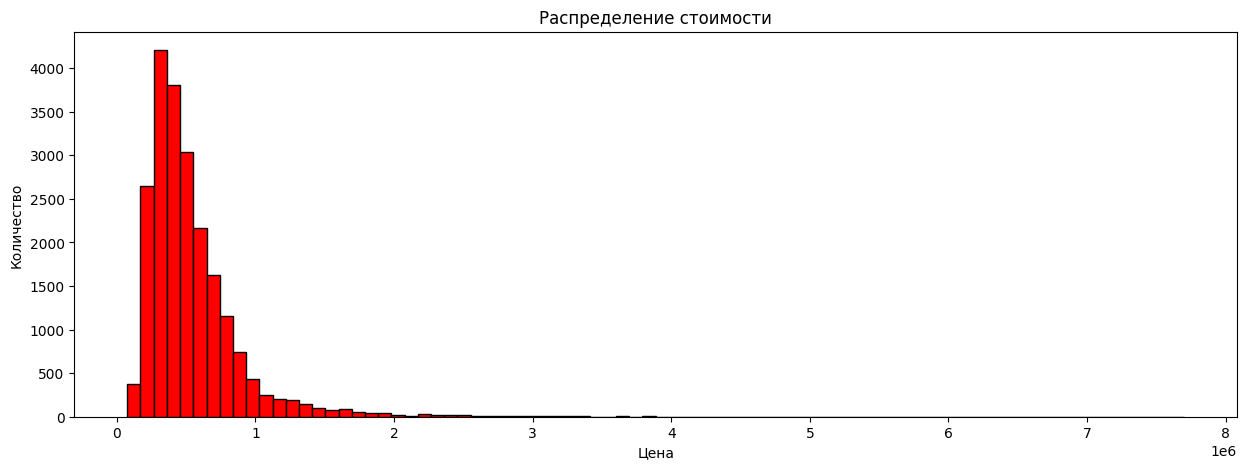

In [4]:
plt.figure(figsize = (15,5))
plt.hist(df['price'], color = 'red', edgecolor='black', bins = 80)
plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество')

большинство домов имеют цену от 200_000 до 600_000

логично посмотреть среднюю цену в зависимости от количества спален

In [5]:
data = df.groupby('bedrooms')['price'].agg(mean='mean').reset_index().sort_values(by='bedrooms')
data.head()

,bedrooms,mean
0,0,409503.846154
1,1,317642.884422
2,2,401372.681884
3,3,466232.078481
4,4,635419.504214


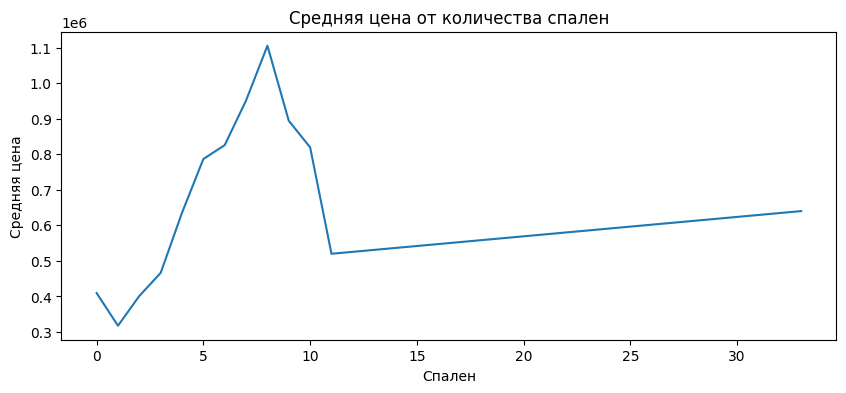

In [6]:
plt.figure(figsize=(10, 4))

plt.plot(data['bedrooms'], data['mean'])

plt.title('Средняя цена от количества спален')
plt.xlabel('Спален')
plt.ylabel('Средняя цена');

видим, что самые дорогие дома имеют от 5 до 10 спален

    1.3. Изучите распределение квадратуры жилой

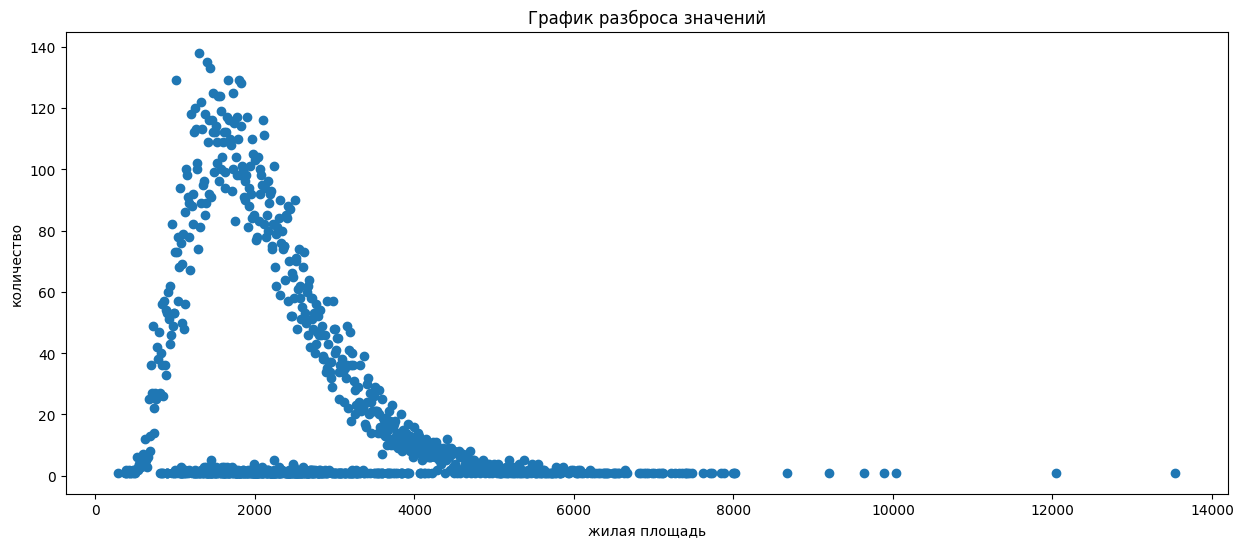

In [7]:
data = df['sqft_living'].value_counts()
# data.shape

names = data.index
values = data.values

plt.figure(figsize=(15, 6))

plt.scatter(names,values)
plt.title('График разброса значений')
plt.xlabel('жилая площадь')
plt.ylabel('количество');

графики не очень информативны, тк площадь слишком мелко разбита. Попробую укрупнить

In [8]:
df['hang_sqft_living'] = df['sqft_living'].apply(lambda x: x//100)

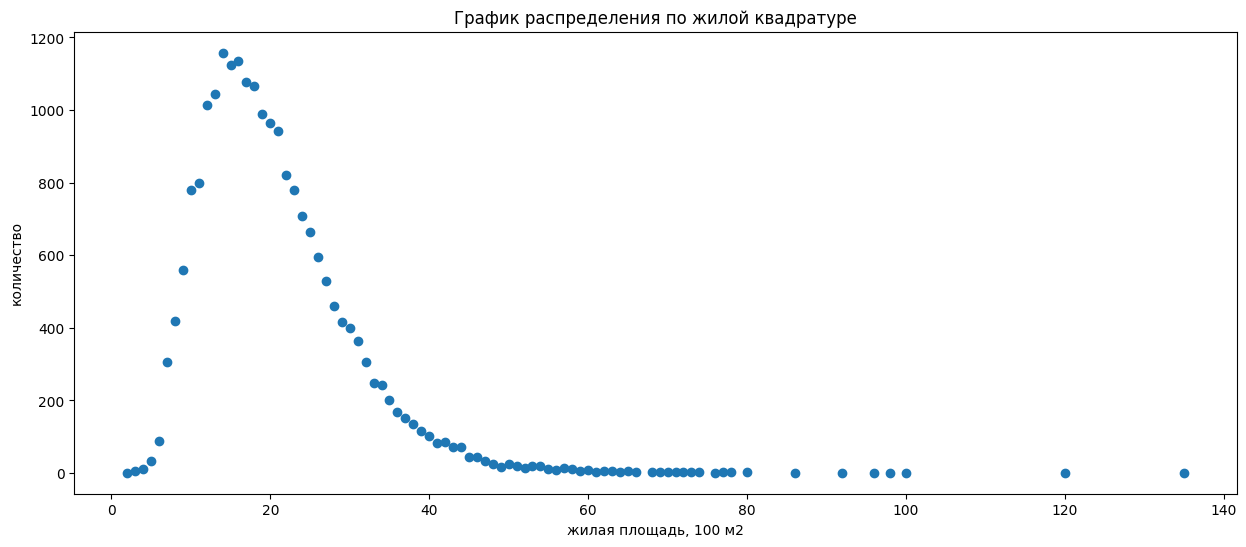

In [9]:
data = df['hang_sqft_living'].value_counts()

names = data.index
values = data.values

plt.figure(figsize=(15, 6))

plt.scatter(names,values)
plt.title('График распределения по жилой квадратуре')
plt.xlabel('жилая площадь, 100 м2')
plt.ylabel('количество');

при укрупнении жилой площади на 100 получаем более нгаглядный график. Видим, что максимально домов от 1000 до 3000 м2

In [10]:
# df.drop(['hang_sqft_living'], axis=1,inplace=True)

    1.4. Изучите распределение года постройки

Text(0, 0.5, 'Количество')

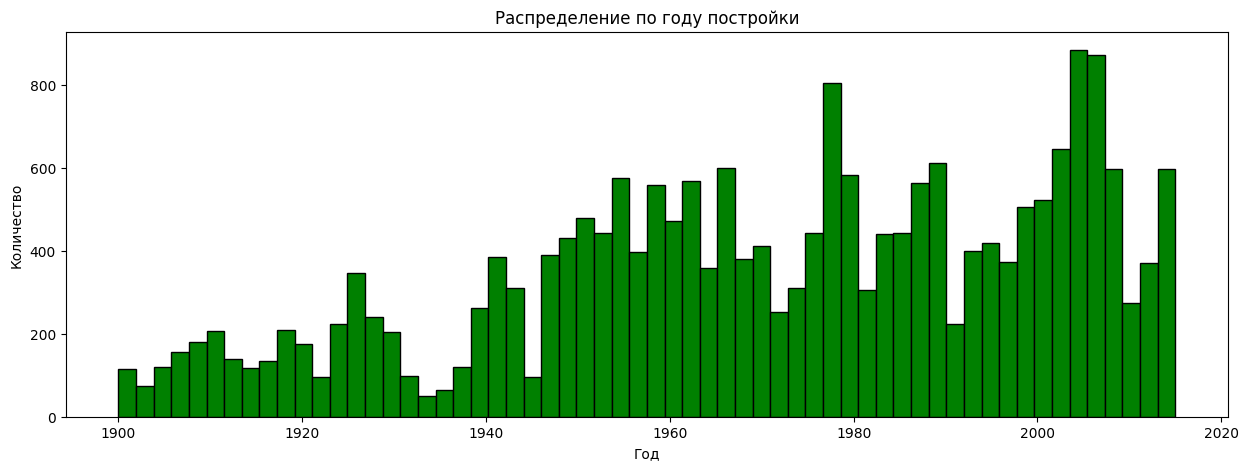

In [11]:
plt.figure(figsize = (15,5))
plt.hist(df['yr_built'], color = 'green', edgecolor='black', bins = 60)
plt.title('Распределение по году постройки')
plt.xlabel('Год')
plt.ylabel('Количество')

Распределение по годам не равномерное. Редко продаются дома довоенной постройки (вполне из-за малого их количества). Самы продаваемые дома 1977-78 гг. и 2007-2010 гг.

### Задача 2.

    2.1. Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

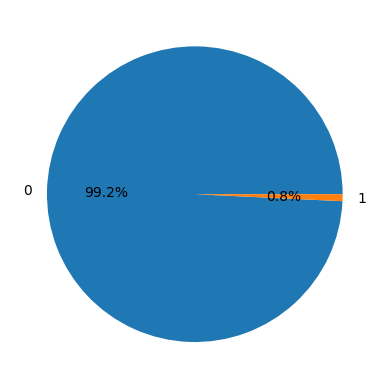

In [12]:
data = df['waterfront'].value_counts()
names = data.index
values = data.values

plt.pie(values, labels=names, autopct='%.1f%%');

дома с видом на набережную очень редки

    2.2. Изучите распределение этажей домов

In [13]:
data = df['floors'].value_counts()
names = data.index
values = data.values

# plt.pie(values, labels=names, autopct='%.1f%%');

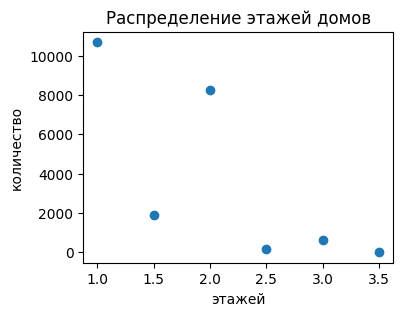

In [14]:
plt.figure(figsize=(4, 3))

plt.scatter(names,values)
plt.title('Распределение этажей домов')
plt.xlabel('этажей')
plt.ylabel('количество');

В основном в продаже одно и трехэтажные дома

    2.3. Изучите распределение состояния домов

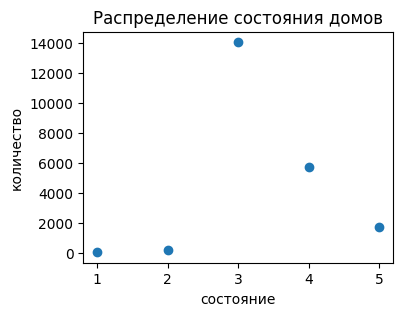

In [15]:
data = df['condition'].value_counts()
names = data.index
values = data.values

plt.figure(figsize=(4, 3))

plt.scatter(names,values)
plt.title('Распределение состояния домов')
plt.xlabel('состояние')
plt.ylabel('количество');

В основном в продаже дома со средним значением состояния. Плохих домов очень мало

### Задача 3.

    Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Для выявления наиболее влияющих характеристик можем построить матрицу корреляций

In [16]:
corr_matrix = df.drop(['date'],axis=1).corr()


In [17]:
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hang_sqft_living
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,...,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0,0.7
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,...,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.6
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,...,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0,0.8
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,...,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0,1.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0,0.4
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,...,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.3
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,...,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


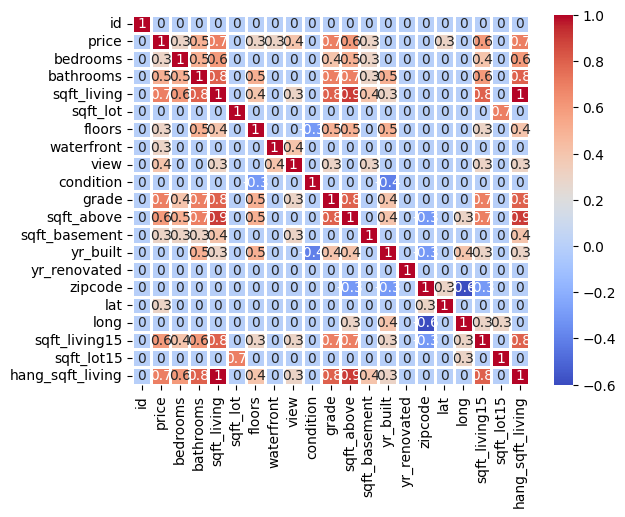

In [18]:
sns.heatmap(corr_matrix, annot=True, linewidth=1, cmap='coolwarm');

из матрицы видим, что цена коррелирует с количеством ванных комнат, жилой площади, от уровня конструкции, метража выше земли, жилой площади соседей. Рассмотрим эти характеристики

C:\Users\Anna\AppData\Local\Temp\ipykernel_18424\396625986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['bathrooms'], y=df['price'], palette=colors)


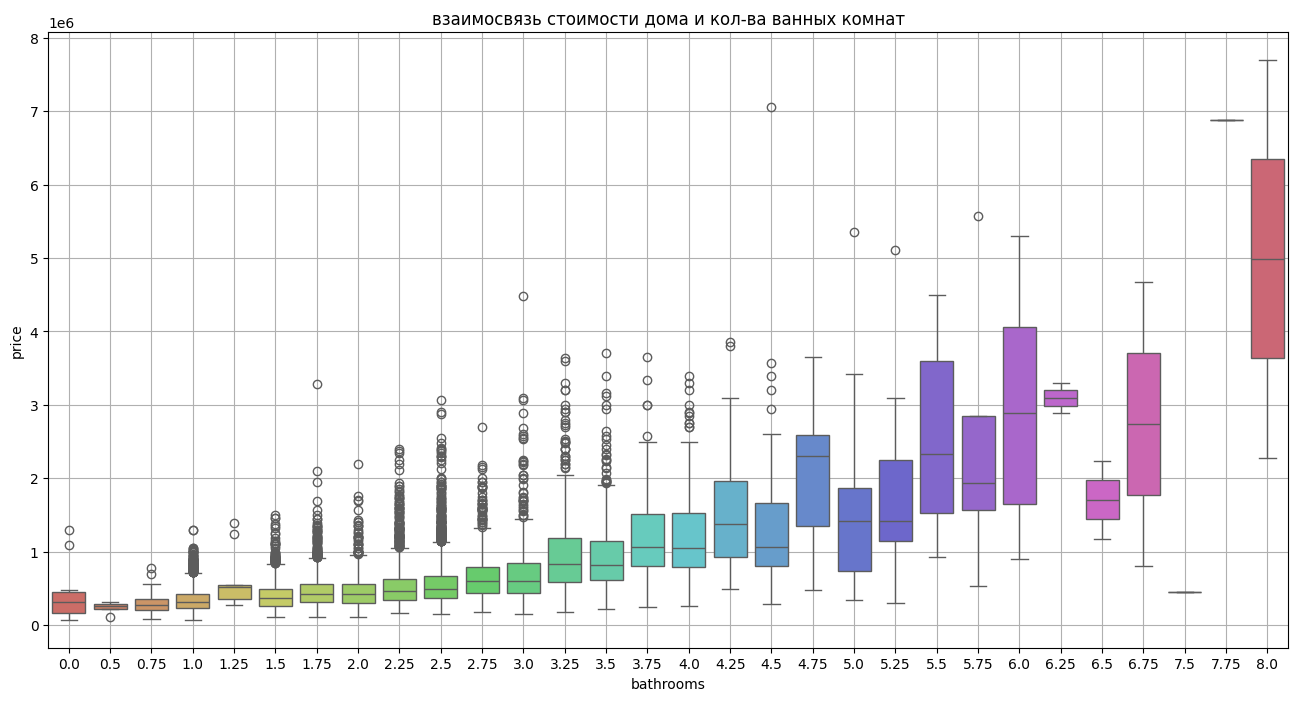

In [19]:
plt.figure(figsize=(16, 8))
colors = sns.color_palette("hls", 30)
sns.boxplot(x=df['bathrooms'], y=df['price'], palette=colors)

plt.title('взаимосвязь стоимости дома и кол-ва ванных комнат')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.grid();

в общих чертах просматривается тенденция роста стоимости дома с ростом количества ванных комнат

Посмотрим график зависимости стоимости от жилой площади. Жилую площадь укрупнили до сотни кв. метров и положили в признак hang_sqft_living для наглядности графика его и возьмем

In [20]:
# plt.figure(figsize=(16, 8))
# colors = sns.color_palette("hls", 30)
# sns.boxplot(x=df['hang_sqft_living'], y=df['price'], palette=colors)

# plt.title('взаимосвязь стоимости дома и кол-ва ванных комнат')
# plt.xlabel('bathrooms')
# plt.ylabel('price')
# plt.grid();

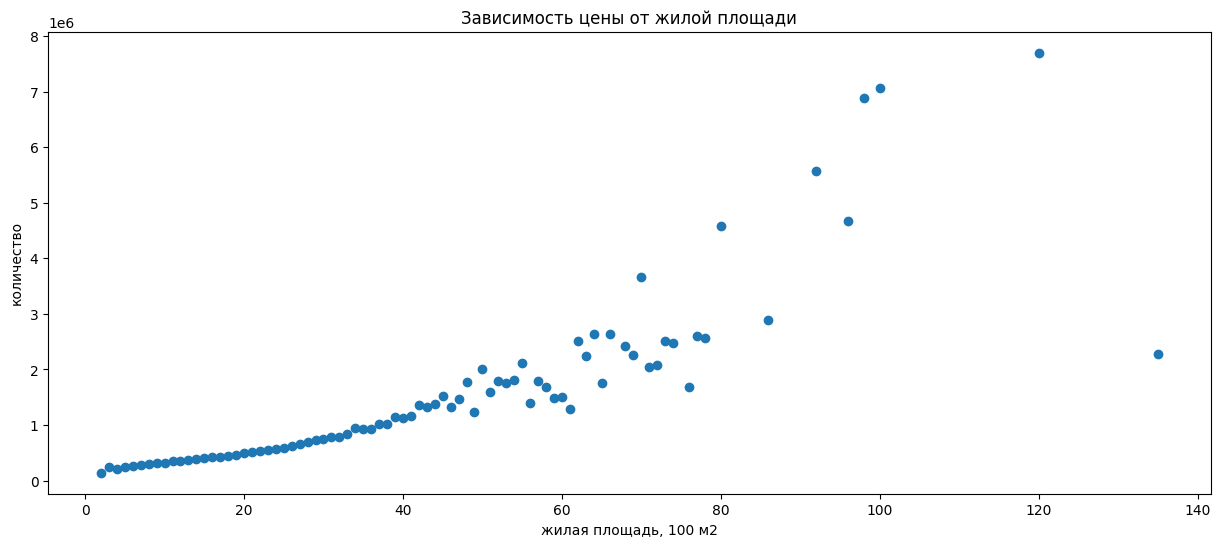

In [21]:

data = df.groupby('hang_sqft_living')['price'].mean().reset_index()
data.head()

plt.figure(figsize=(15, 6))

plt.scatter(data['hang_sqft_living'],data['price'])
plt.title('Зависимость цены от жилой площади')
plt.xlabel('жилая площадь, 100 м2')
plt.ylabel('количество');

In [22]:
# sns.jointplot(x=df['hang_sqft_living'], y=df['price'], kind='reg');

Хорошо прослеживается прямая зависимость стоимости дома от жилой площади

Построим график зависимости стоимости дома от качества конструкции

C:\Users\Anna\AppData\Local\Temp\ipykernel_18424\458847681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['grade'], y=df['price'], palette=colors)
C:\Users\Anna\AppData\Local\Temp\ipykernel_18424\458847681.py:3: UserWarning: The palette list has more values (13) than needed (12), which may not be intended.
  sns.boxplot(x=df['grade'], y=df['price'], palette=colors)


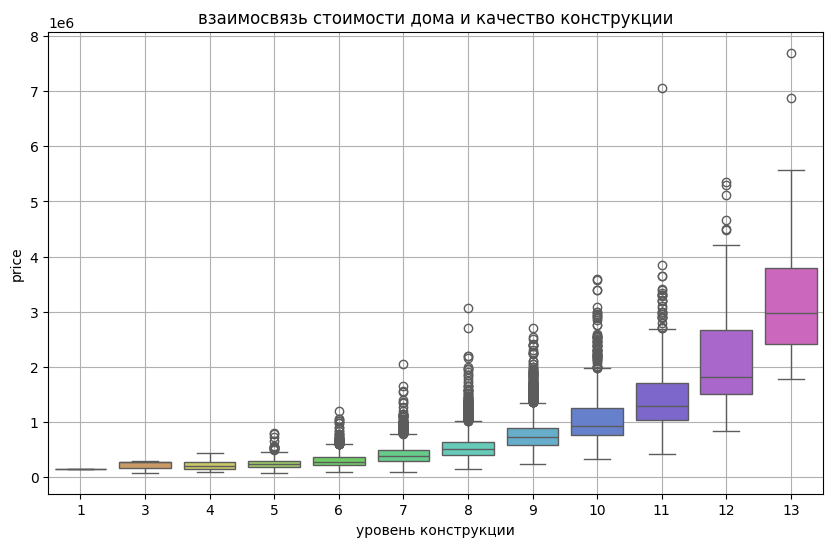

In [25]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("hls", 13)
sns.boxplot(x=df['grade'], y=df['price'], palette=colors)

plt.title('взаимосвязь стоимости дома и качество конструкции')
plt.xlabel('уровень конструкции')
plt.ylabel('price')
plt.grid();

Прослеживается явная тенденция роста стоимости при росте уровня конструкции. Причем при уровне от 1 до 4 заметно отсутствие выбросов. При таком уровне бесполезно пробовать завысить цену

Далее на очереди рассмотрение зависимости цены от площади "выше земли" и жилой площади соседей. Картина явно будет совпадать с графиком зависимости стоимости от жилой площади, т.к. три признака жилой площади имеют коэффициент корреляции между собой выше 0,8. 